<a href="https://colab.research.google.com/github/Nilayatabek/-devler/blob/main/kritik_yol.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import networkx as nx
import matplotlib.pyplot as plt


In [4]:
# Faaliyet süreleri (hafta)
durations = {
    "A": 2,  # Pazar araştırması
    "B": 4,  # Hukuki kontroller
    "C": 3,  # Etiket / ambalaj uyarlaması
    "D": 5,  # Üretim planı ve ilk parti
    "E": 3,  # Dağıtım sözleşmeleri
    "F": 4,  # Pazarlama kampanya tasarımı
    "G": 3,  # Mağaza içi reklam kurulumu
    "H": 0   # Lansman (milestone)
}

# Öncelik ilişkileri
precedences = [
    ("A", "F"),
    ("B", "C"), ("B", "D"),
    ("C", "E"), ("D", "E"),
    ("E", "G"),
    ("F", "H"), ("G", "H")
]


In [5]:
G = nx.DiGraph()

# Düğümleri ekle
for task, dur in durations.items():
    G.add_node(task, duration=dur)

# Okları ekle
G.add_edges_from(precedences)


In [6]:
# Forward pass: ES ve EF
ES, EF = {}, {}

for node in nx.topological_sort(G):
    if G.in_degree(node) == 0:
        ES[node] = 0
    else:
        ES[node] = max(EF[pred] for pred in G.predecessors(node))
    EF[node] = ES[node] + durations[node]

project_duration = EF["H"]


In [7]:
# Backward pass: LS ve LF
LS, LF = {}, {}

for node in reversed(list(nx.topological_sort(G))):
    if G.out_degree(node) == 0:
        LF[node] = project_duration
    else:
        LF[node] = min(LS[succ] for succ in G.successors(node))
    LS[node] = LF[node] - durations[node]


In [8]:
# Slack hesapları
slack = {node: LS[node] - ES[node] for node in G.nodes()}

critical_tasks = [node for node in G.nodes() if slack[node] == 0]

print("Toplam proje süresi:", project_duration, "hafta")
print("Kritik faaliyetler:", " → ".join(critical_tasks))


Toplam proje süresi: 15 hafta
Kritik faaliyetler: B → D → E → G → H


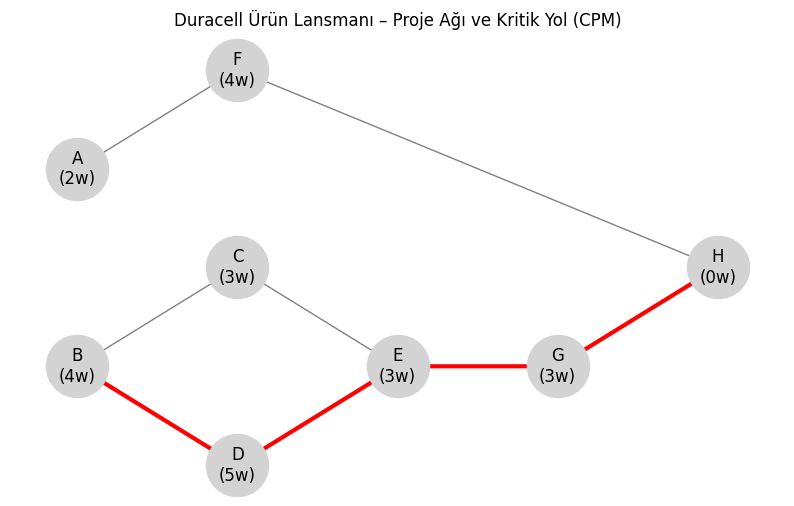

In [10]:
plt.figure(figsize=(10, 6))

# Elle konumlandırma (layered layout)
pos = {
    "A": (0, 2),
    "B": (0, 0),
    "C": (2, 1),
    "D": (2, -1),
    "E": (4, 0),
    "F": (2, 3),
    "G": (6, 0),
    "H": (8, 1)
}

# Kritik ve normal kenarları ayır
critical_edges = []
normal_edges = []

for u, v in G.edges():
    if u in critical_tasks and v in critical_tasks:
        critical_edges.append((u, v))
    else:
        normal_edges.append((u, v))

# Düğümler
nx.draw_networkx_nodes(G, pos, node_size=2000, node_color="lightgrey")

# Normal kenarlar
nx.draw_networkx_edges(G, pos,
                       edgelist=normal_edges,
                       edge_color="grey",
                       arrows=True)

# Kritik yol (kırmızı)
nx.draw_networkx_edges(G, pos,
                       edgelist=critical_edges,
                       edge_color="red",
                       width=3,
                       arrows=True)

# Etiketler (aktivite + süre)
labels = {n: f"{n}\n({durations[n]}w)" for n in G.nodes()}
nx.draw_networkx_labels(G, pos, labels)

plt.title("Duracell Ürün Lansmanı – Proje Ağı ve Kritik Yol (CPM)")
plt.axis("off")
plt.show()


In [ ]:
print("Toplam proje süresi: 15 hafta")
print("Kritik faaliyetler: B → D → E → G → H")